# Winding gap.
This notebook serves to investigate the cost of flux excitations in the system. The idea is, to look at the gaps to the lowest state that carries flux and normalize it by it's length, thus 

$$
    \kappa_F = \frac{E_F - E_0}{L_F} = \frac{\Delta_F}{L_F}
$$
where $E_F$ is the energy with the single flux and $L_F$ is it's length. This is the analysis done in Fig.8 of [1] where, they call $\kappa_F$ the *monopole string tension*. In the $U(1)$ liquid, such excitations should be free (or at least cheap in the finite volume). For any ordered state, this costs energy and therefore this is sort of an order parameter?

#### Papers
[1] [Sikora 2011](https://journals.aps.org/prb/abstract/10.1103/PhysRevB.84.115129)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import sys
sys.path.append('../python_data/')
from ed_result_wrapper import EDResult

## Results.
For 2x2x2 and 2x2x4 we have "full" (i.e., Lanczos) results, for 2x2x6 we need to rely on the low-energy method. These values still need to be produced.

In [10]:
data_dir = "/home/lukas/projects/QLMs/FQLMs/python_data/winding_gaps/"

# Winding states.
gs222 = EDResult({'L' : [2,2,2], 'gp' : 'bosons', 'ws' : [0,0,0]}, data_dir)
ex222_001 = EDResult({'L' : [2,2,2], 'gp' : 'bosons', 'ws' : [0,0,1]}, data_dir)
ex222_001.compute_gap(gs=gs222.get_gs())


gs224 = EDResult({'L' : [2,2,4], 'gp' : 'bosons', 'ws' : [0,0,0]}, data_dir)
ex224_100 = EDResult({'L' : [2,2,4], 'gp' : 'bosons', 'ws' : [1,0,0]}, data_dir)
ex224_100.compute_gap(gs=gs224.get_gs())
ex224_001 = EDResult({'L' : [2,2,4], 'gp' : 'bosons', 'ws' : [0,0,1]}, data_dir)
ex224_001.compute_gap(gs=gs224.get_gs())

ED results for datafile '/home/lukas/projects/QLMs/FQLMs/python_data/winding_gaps//results_bosons_wx_2-wy_2-wz_2_2x2x2.hdf5'
ED results for datafile '/home/lukas/projects/QLMs/FQLMs/python_data/winding_gaps//results_bosons_wx_2-wy_2-wz_3_2x2x2.hdf5'
ED results for datafile '/home/lukas/projects/QLMs/FQLMs/python_data/winding_gaps//results_bosons_wx_4-wy_4-wz_2_2x2x4.hdf5'
ED results for datafile '/home/lukas/projects/QLMs/FQLMs/python_data/winding_gaps//results_bosons_wx_5-wy_4-wz_2_2x2x4.hdf5'
ED results for datafile '/home/lukas/projects/QLMs/FQLMs/python_data/winding_gaps//results_bosons_wx_4-wy_4-wz_3_2x2x4.hdf5'


### Technical note
since it's possible, that different runs proceed at different values of $\lambda$, we perform an interpolation of the GS in order to to have a reference point.

This works well for 2x2x2 and 2x2x4 systems, since we have a lot of datapoints there. For larger system, we should run the same values of $\lambda$.

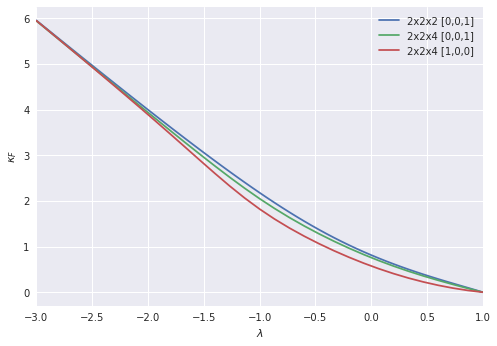

In [28]:
with plt.style.context('seaborn'):
    fig, ax = plt.subplots()
    
    # --------------------------
    # 2x2x2
    sub = ex222_001.ev[ex222_001.ev['N']==0]
    ax.plot(sub['lambda'], sub['delta_e']/2, label='2x2x2 [0,0,1]')

    # --------------------------
    # 2x2x4
    sub = ex224_001.ev[ex224_001.ev['N']==0]
    ax.plot(sub['lambda'], sub['delta_e']/4, label='2x2x4 [0,0,1]')
    
    sub = ex224_100.ev[ex224_100.ev['N']==0]
    ax.plot(sub['lambda'], sub['delta_e']/2, label='2x2x4 [1,0,0]')
    
    # --------------------------
    # 2x2x6.
    
    # TODO.
    
    # --------------------------
    
    ax.set_xlabel('$\\lambda$')
    ax.set_ylabel('$\\kappa_F$')
    
    ax.legend(loc='upper right')
    ax.set_xlim(-3,1)
#     ax.set_ylim(0,1)